# 한국어 형태소 분석기 - Sonlpy
- 비지도학습 기반의 형태소 분석기
- 미등록 토큰에 대한 처리가 좋음 

In [1]:
# 데이터 준비
DATA_FILE = '../10_04/DATA/2016-10-20.txt'

## [말뭉치 생성]
---

In [2]:
# 모듈 로딩 
from soynlp.utils import DoublespaceLineCorpus

In [3]:
# 파일에서 데이터 말뭉치(즉, 코퍼스) 생성   
data_corpus = DoublespaceLineCorpus(DATA_FILE)

In [4]:
print(type(data_corpus), len(data_corpus))

<class 'soynlp.utils.utils.DoublespaceLineCorpus'> 30091


In [5]:
# 5개 문서 추출 
for idx, doc in enumerate(data_corpus):
    if idx ==5: break
    print(f'[{idx}] === \n{doc}')

[0] === 

[1] === 
19  1990  52 1 22
[2] === 
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 

## [단어 추출]
---

In [6]:
# 단어 추출 모듈 로딩
from soynlp.word import WordExtractor

In [7]:
# 단어 추출 인스턴스 생성 
word_ext = WordExtractor()

- 비지도 학습이라서 학습 필요

In [8]:
# 텍스트 데이터 제공 비지도 학습 진행 
word_ext.train(data_corpus)

training was done. used memory 0.754 Gb


In [9]:
# 단어 추출 
result = word_ext.extract()

all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## [토큰별 점수 확인]
---

Branching Entropy : 다음에 나올 글자의 확률값을 계산
- 쉽게 예측 가능하면 확률은 0
- 다음에 나올 글자들의 경우의 수가 많으면 1에 가까움

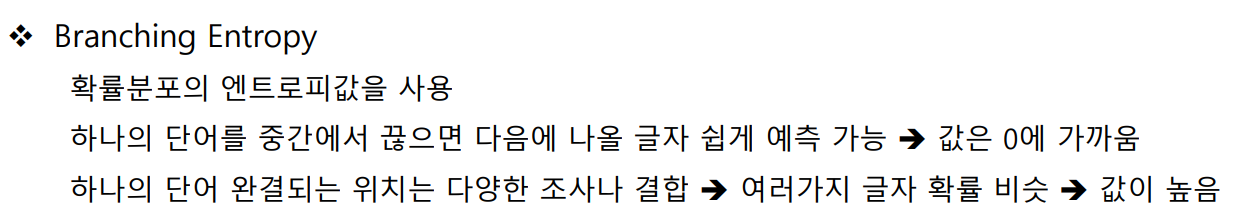

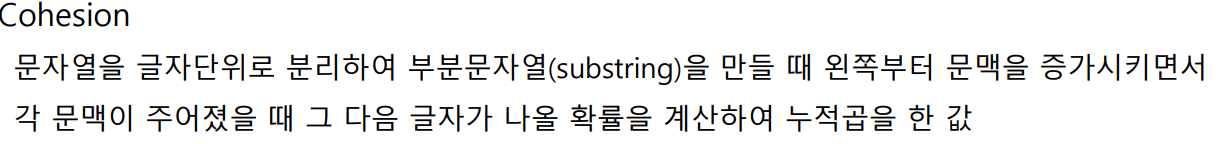

In [10]:
result['연']

Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=4.8206195206885205, right_branching_entropy=3.9203300200537807, left_accessor_variety=477, right_accessor_variety=351, leftside_frequency=25178, rightside_frequency=3554)

In [11]:
result['연합']

Scores(cohesion_forward=0.1943363253634125, cohesion_backward=0.07681159420289856, left_branching_entropy=3.165258188202937, right_branching_entropy=0.4251664085353198, left_accessor_variety=157, right_accessor_variety=41, leftside_frequency=4893, rightside_frequency=159)

In [12]:
result['연합뉴']

Scores(cohesion_forward=0.43154839105434084, cohesion_backward=0, left_branching_entropy=2.9790047637715187, right_branching_entropy=-0.0, left_accessor_variety=142, right_accessor_variety=1, leftside_frequency=4689, rightside_frequency=0)

In [13]:
result['연합뉴스']

Scores(cohesion_forward=0.5710254410737682, cohesion_backward=0, left_branching_entropy=2.979159952224212, right_branching_entropy=3.892038729521627, left_accessor_variety=142, right_accessor_variety=162, leftside_frequency=4688, rightside_frequency=0)

뭉쳐서 나올 확률이 점점 높아짐

In [14]:
result['연합과']

KeyError: '연합과'

- 해당 단어는 존재하지 않음

In [15]:
result['연합뉴스'].cohesion_forward  # 응집점수만 봄

0.5710254410737682

In [16]:
result['연합뉴스'].right_branching_entropy 

3.892038729521627

In [17]:
print('토큰의 cohesion_forward 속성값 : ', result['연합뉴'].cohesion_forward)
print('토큰의 right_branching_entropy 속성값 : ', result['연합뉴'].right_branching_entropy)
print('토큰의 right_accessor_variety 속성값 : ', result['연합뉴'].right_accessor_variety)

토큰의 cohesion_forward 속성값 :  0.43154839105434084
토큰의 right_branching_entropy 속성값 :  -0.0
토큰의 right_accessor_variety 속성값 :  1


## [문장의 토큰화]
---
- Tokenizer 인스턴스 필요


In [21]:
from soynlp.tokenizer import LTokenizer

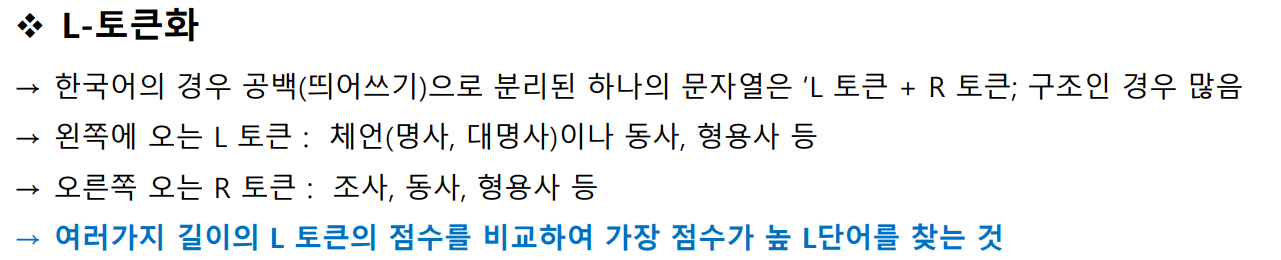

In [24]:
# 공백 기준 분리
tokenizer = LTokenizer()
print(tokenizer.tokenize('안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다'))
print()
print(tokenizer.tokenize('안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다', flatten=False))

['안전성에', '문제있는', '스마트폰을', '휴대하고', '탑승할', '경우에', '압수한다']

[('안전성에', ''), ('문제있는', ''), ('스마트폰을', ''), ('휴대하고', ''), ('탑승할', ''), ('경우에', ''), ('압수한다', '')]


In [26]:
# 단어별 점수 기준 분리 -> 조사를 기준으로 나눠줌 - 높은 점수를 기준으로 나눔 
scores = {item:score.cohesion_forward for item, score in result.items()}                                               

tokenizer = LTokenizer(scores=scores)
tokenizer.tokenize('안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다', flatten=False)

[('안전', '성에'),
 ('문제', '있는'),
 ('스마트폰', '을'),
 ('휴대', '하고'),
 ('탑승', '할'),
 ('경우', '에'),
 ('압수', '한다')]